#                                           Apple stock analysis:

Hi there. We are going to do an analysis of the effect of the date of payment of dividends of the apple company on the price of its share. For that I download two csv files from yahoo finance website. One contains the daily share price and the other the dividends issued per share on each issue date throughout the history of this company, which is the largest capitalization in the world. Let's first take a look at the data in the first file.

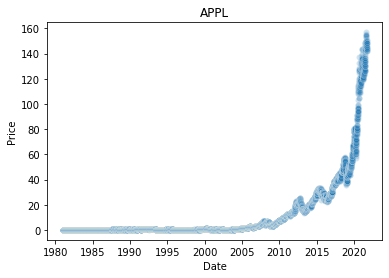

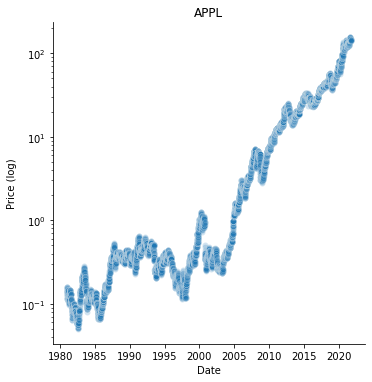

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
price=pd.read_csv('AAPL (1).csv')
price.head()
#convert the date column to datetime
price['Date']= pd.to_datetime(price['Date'])

sns.scatterplot(x='Date',y='Open',data=price,alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('APPL')
plt.show()

g=sns.relplot(x='Date',y='Open',data=price,alpha=0.2,kind="scatter")
g.set(yscale="log")
plt.xlabel('Date')
plt.ylabel('Price (log)')
plt.title('APPL')
plt.show()


As we can see in the second graph, there is a more accelerated increase in the last decade. Now let's take a look at the second file.

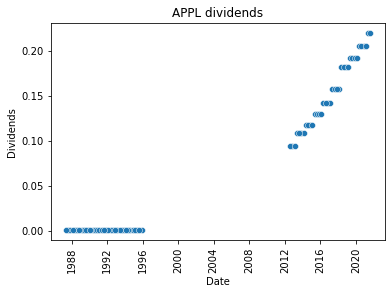

In [2]:
dividends=pd.read_csv('AAPL.csv')
dividends.head()
dividends['Date']= pd.to_datetime(dividends['Date'])
sns.scatterplot(x='Date',y='Dividends',data=dividends)
plt.xlabel('Date')
plt.ylabel('Dividends')
plt.title('APPL dividends')
plt.xticks(rotation = 90)
plt.show()

In the first years we cannot see the values well because they are all very small, then from 96 to 2012 there were no dividend dates and from then on it did not stop increasing, it undoubtedly shows favorable growth.
Let's zoom to the first part.

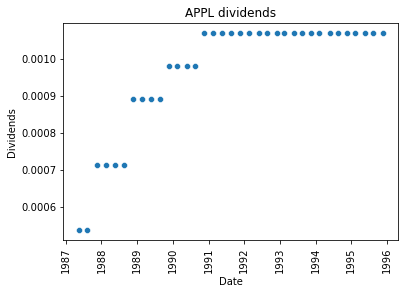

In [6]:
zoom_dividens=dividends[dividends['Date']<datetime(1998,1,1)]
sns.scatterplot(x='Date',y='Dividends',data=zoom_dividens)
plt.xlabel('Date')
plt.ylabel('Dividends')
plt.title('APPL dividends')
plt.xticks(rotation = 90)
plt.show()


Now let's look at the relationship that exists between dividends and price and how the pandemic affected that relationship.



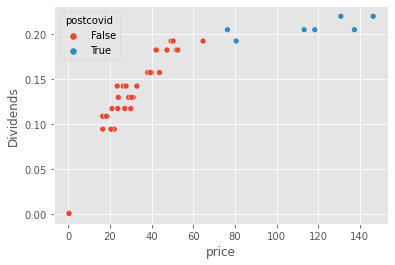

In [15]:

merged=pd.merge(price,dividends,on='Date')
merged['postcovid']=merged['Date']>datetime(2020,1,1)
sns.scatterplot(x='Open',y='Dividends',hue='postcovid',data=merged)
plt.xlabel('price')
plt.show()



We can see a clear direct proportionality relationship until the pandemic. Now let's make another observation about the dividend percentages represented in prices throughout history.

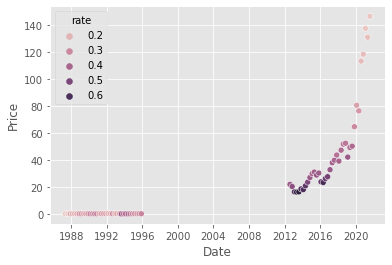

In [17]:
merged['rate']=merged['Dividends']/merged['Open']*100
sns.scatterplot(x='Date',y='Open',hue='rate',data=merged)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [18]:
merged.groupby('postcovid')['rate'].describe()

,count,mean,std,min,25%,50%,75%,max
postcovid,,,,,,,,
False,65.0,0.355078,0.130718,0.124419,0.247155,0.347652,0.431978,0.663320
True,7.0,0.189886,0.045805,0.149254,0.159228,0.173259,0.209972,0.268289


Then the covid-19 affected the percentage of return of this action. we should review more actions. to see if it made it to the market in general.

Now let's look at the result of a dividend date. To do this, with the data we have, we are going to see the share price every day in the period of 10 days before and 10 days after to see if there is any behavior pattern on these dates.

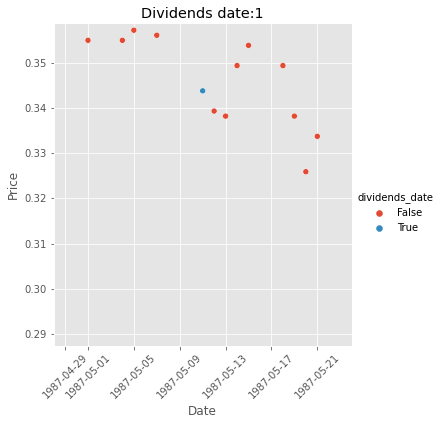

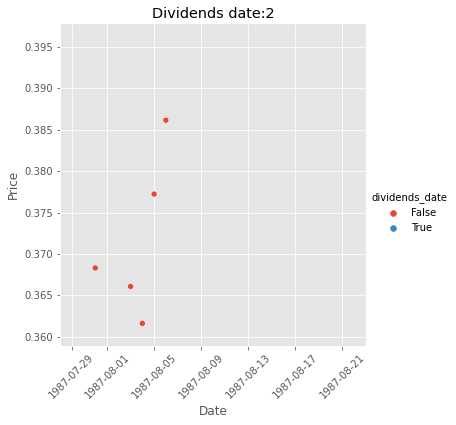

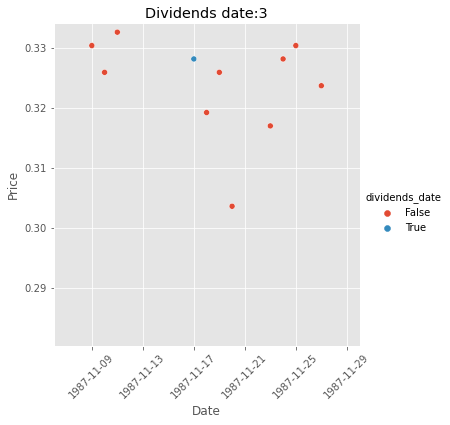

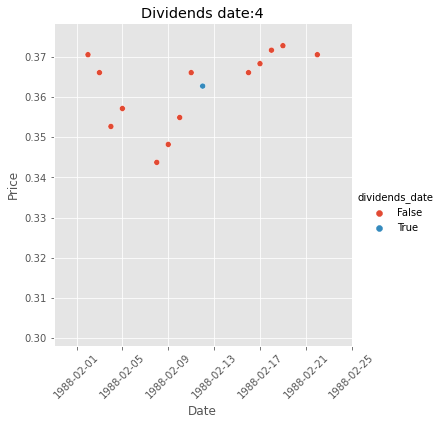

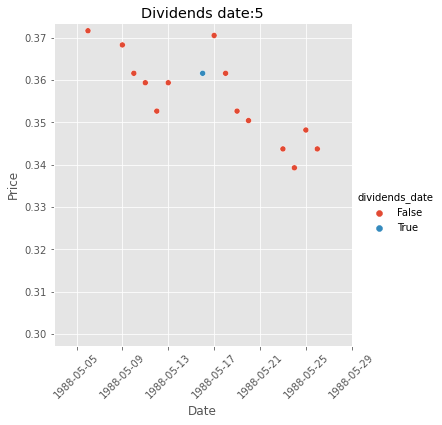

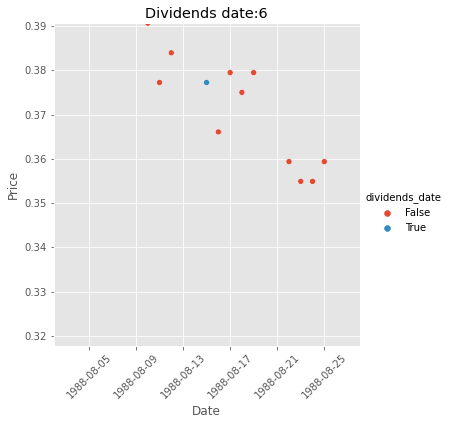

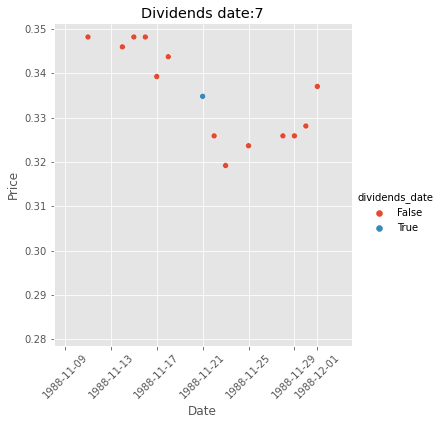

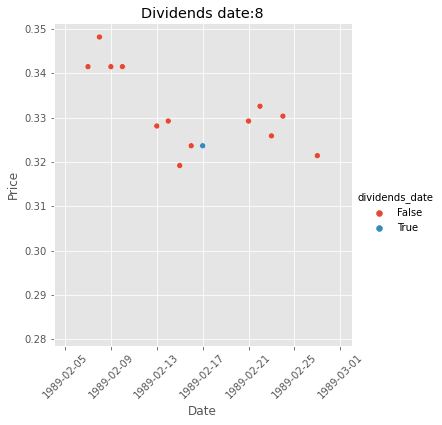

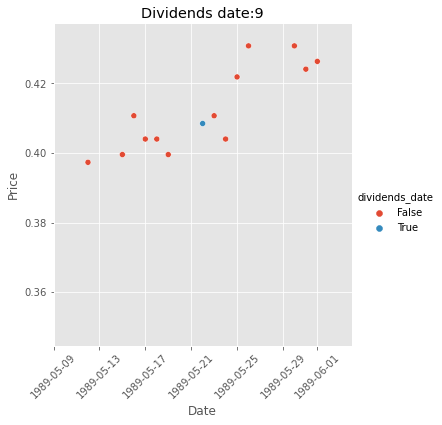

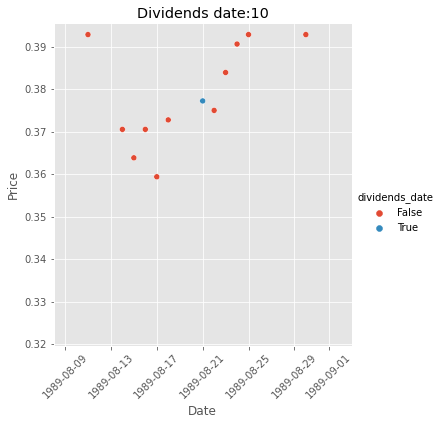

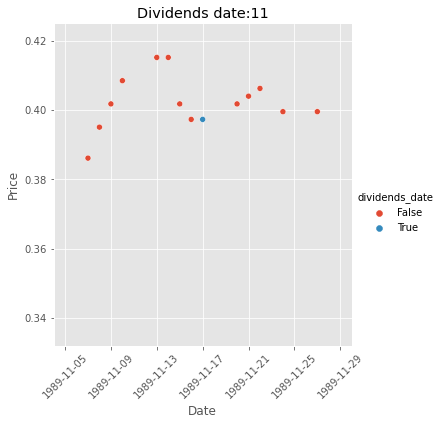

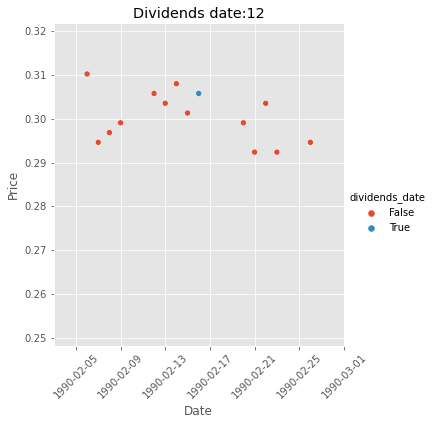

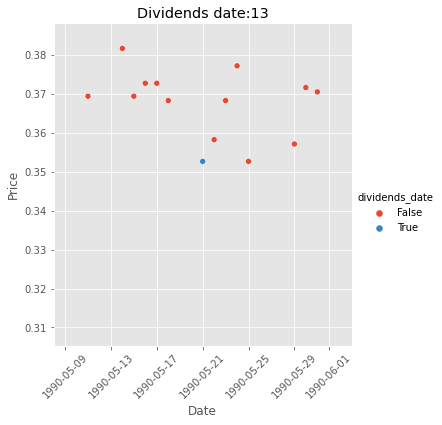

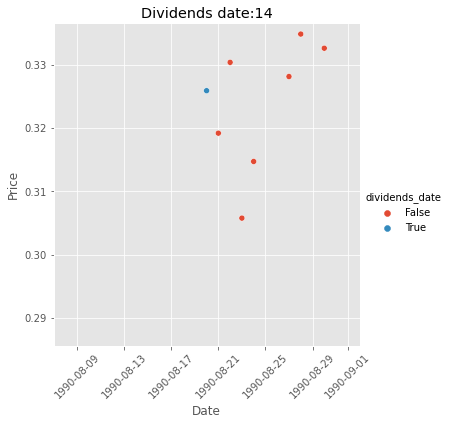

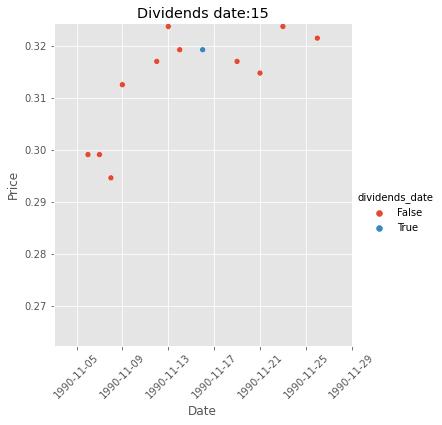

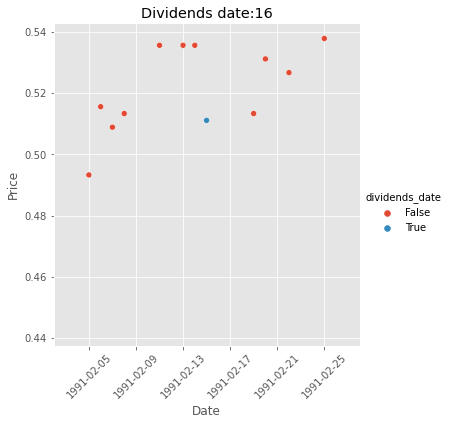

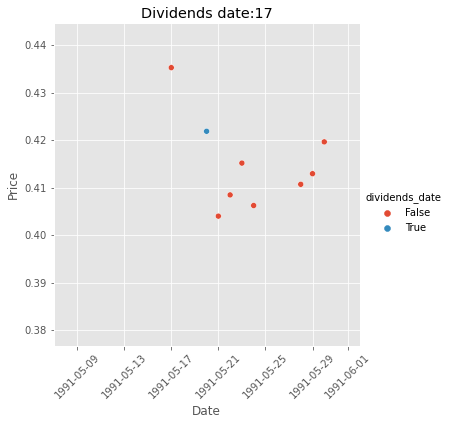

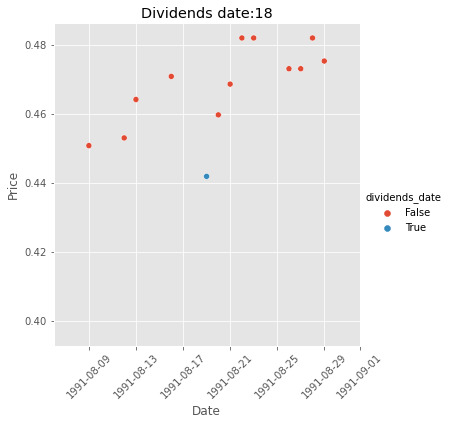

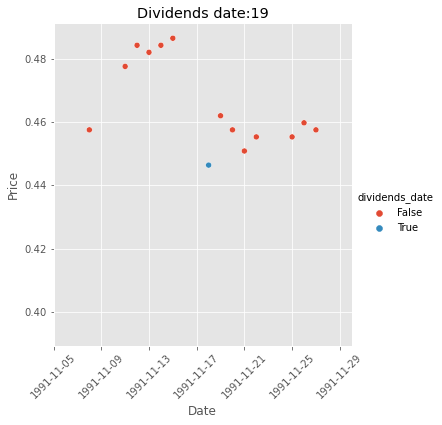

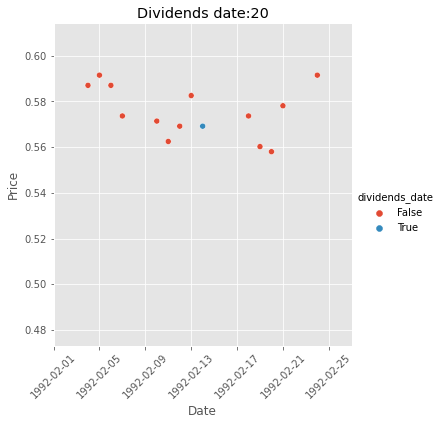

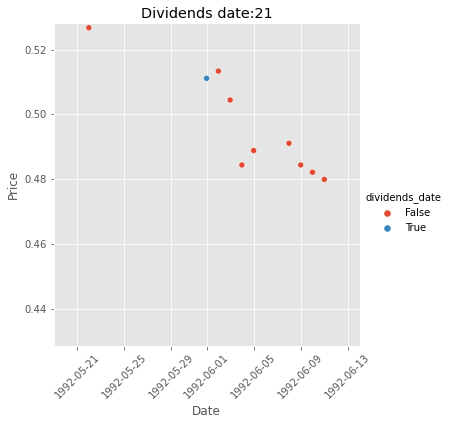

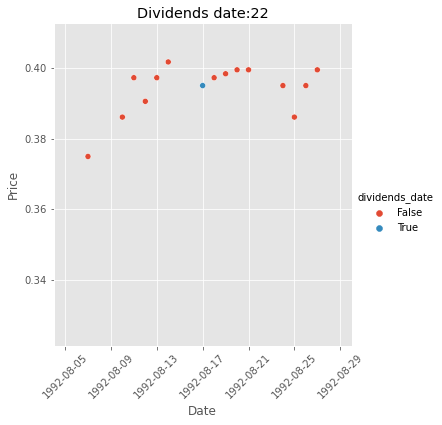

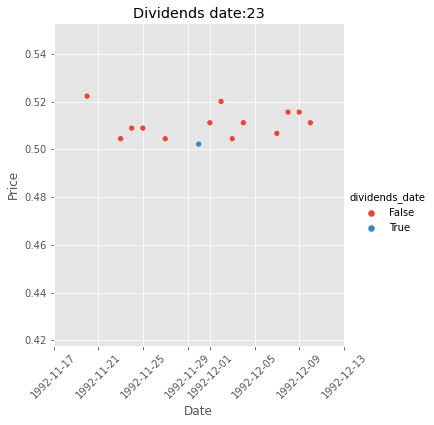

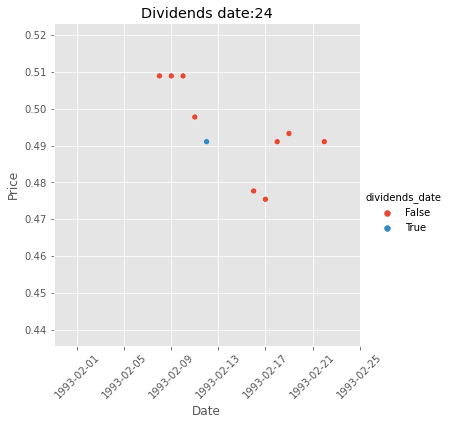

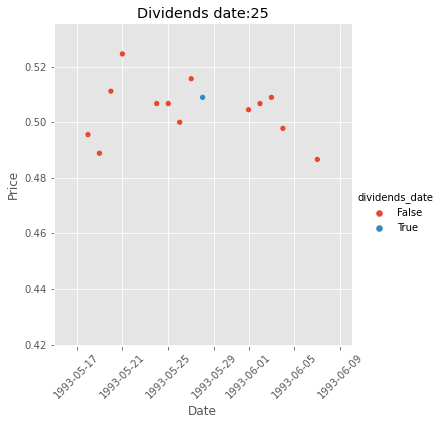

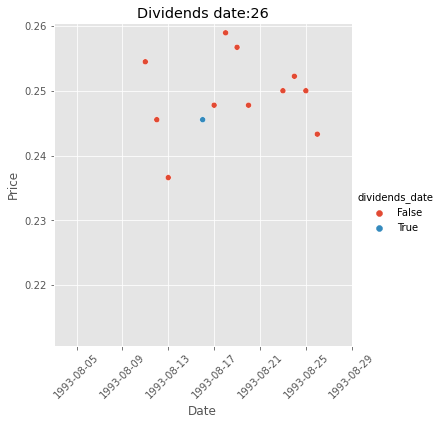

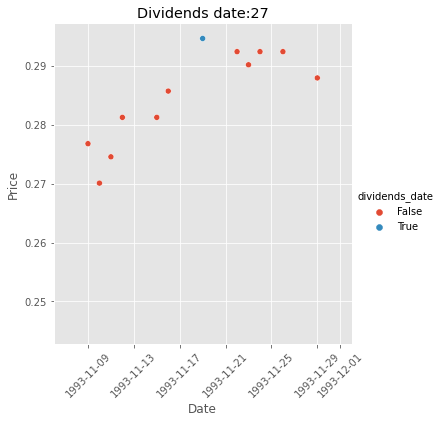

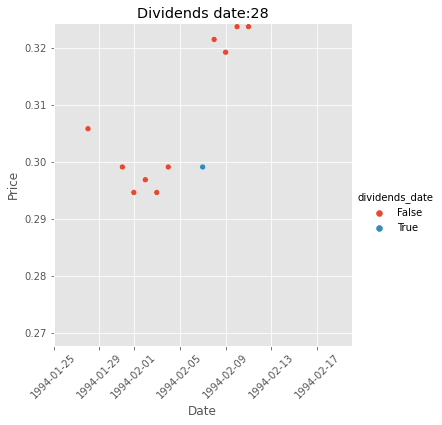

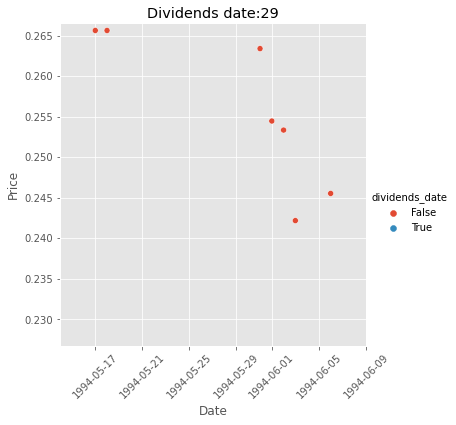

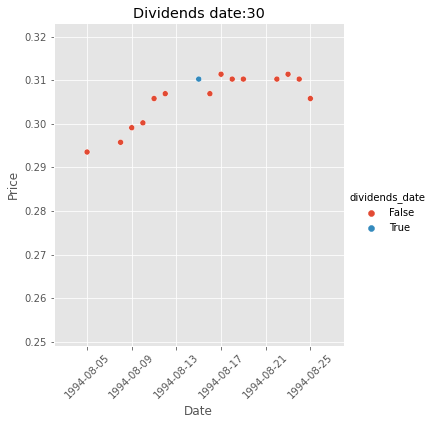

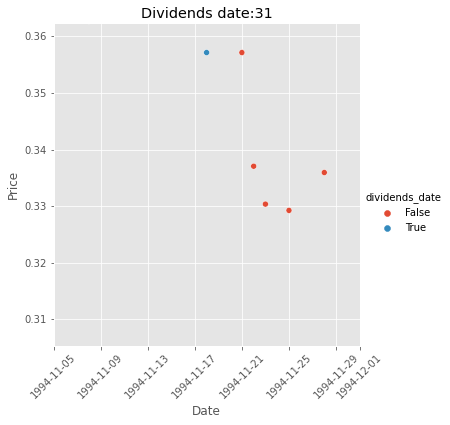

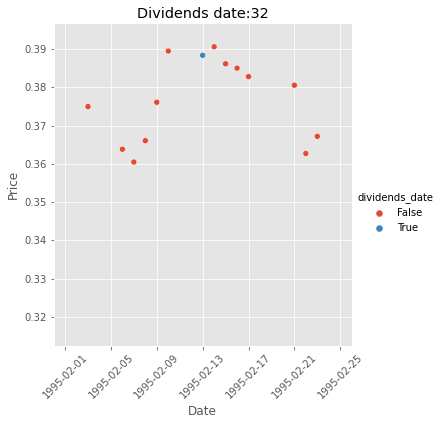

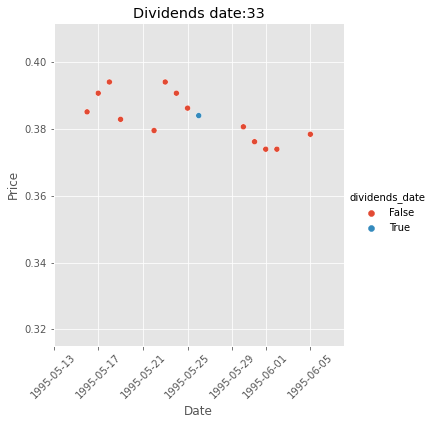

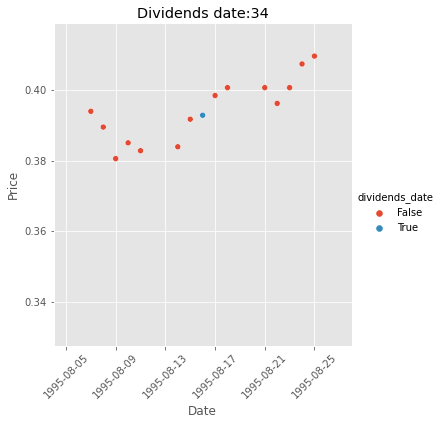

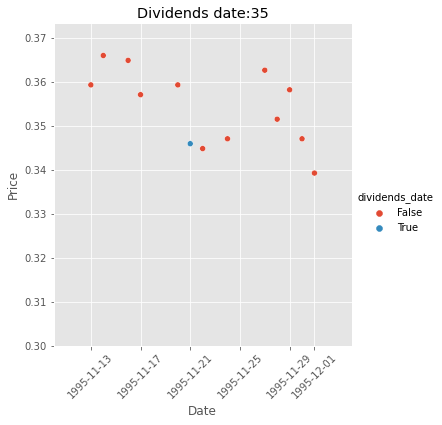

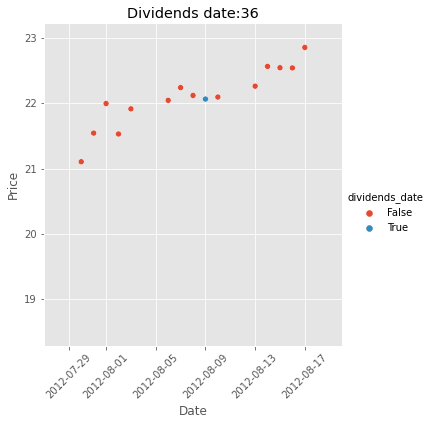

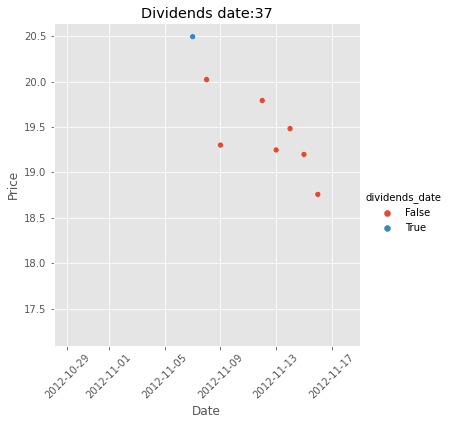

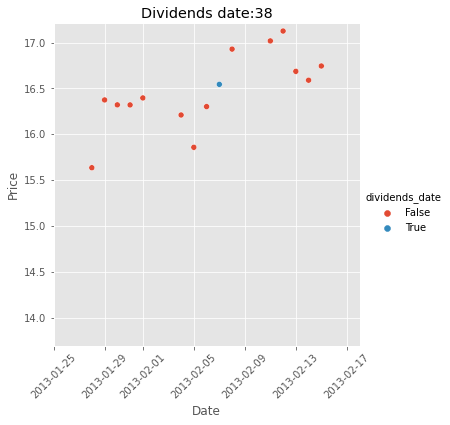

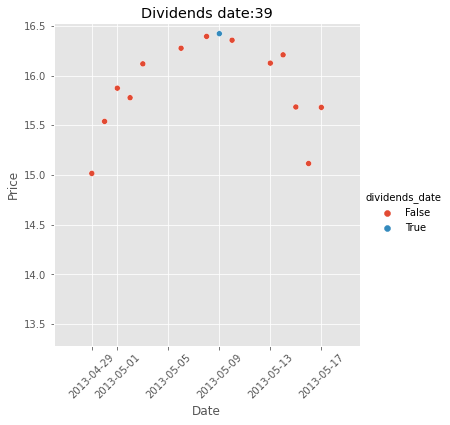

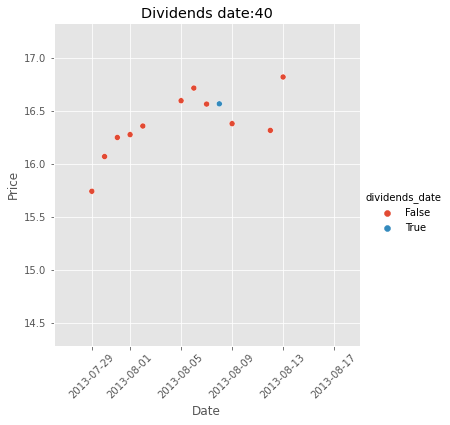

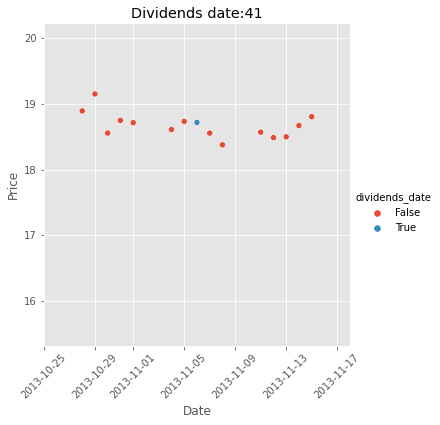

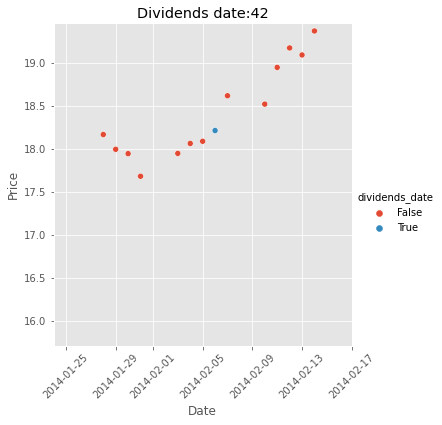

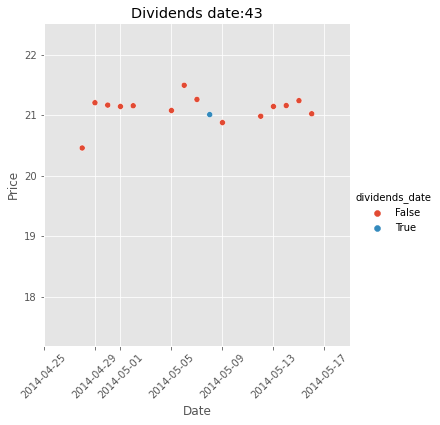

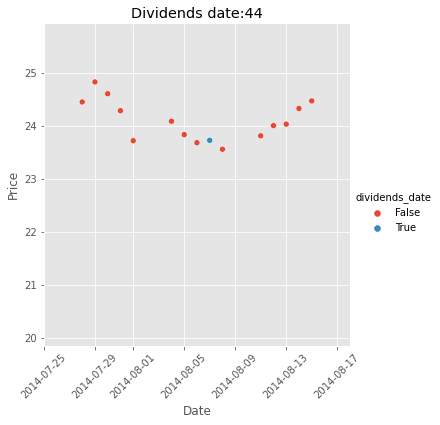

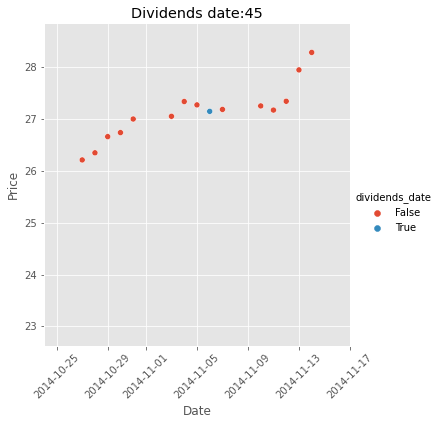

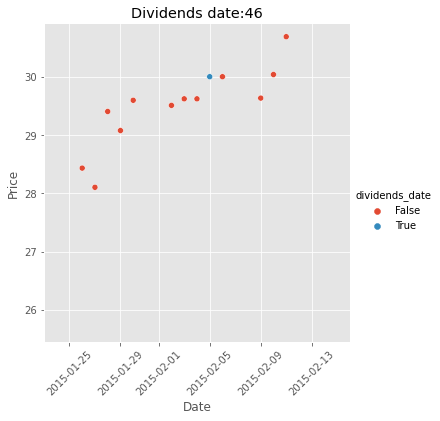

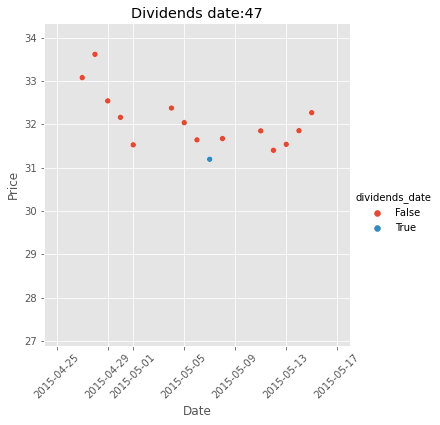

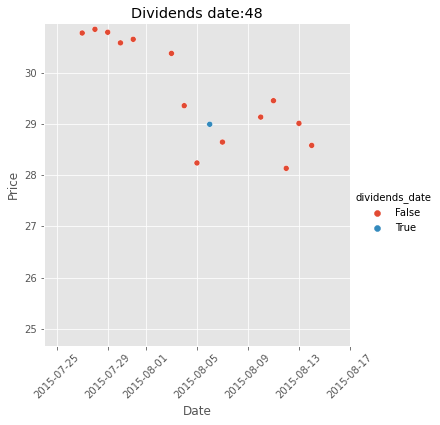

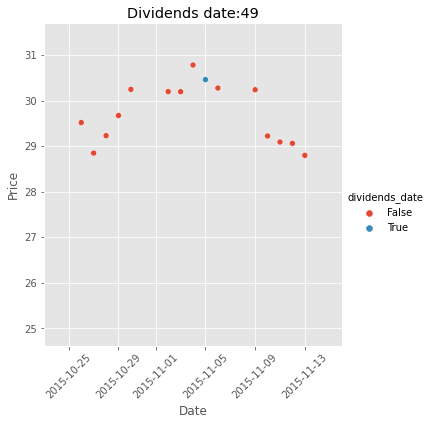

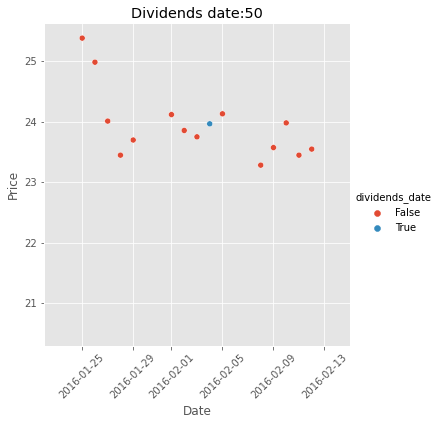

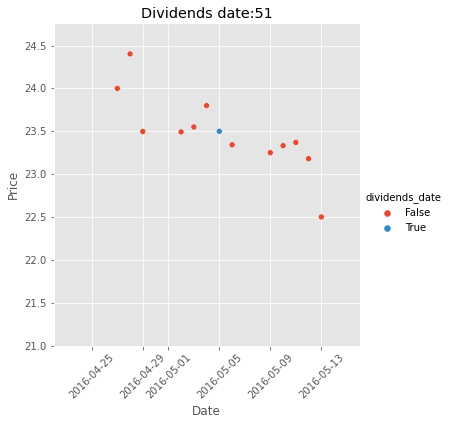

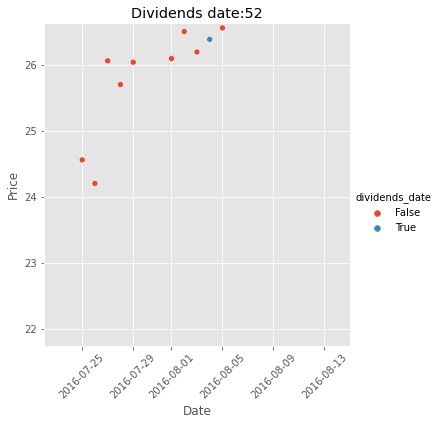

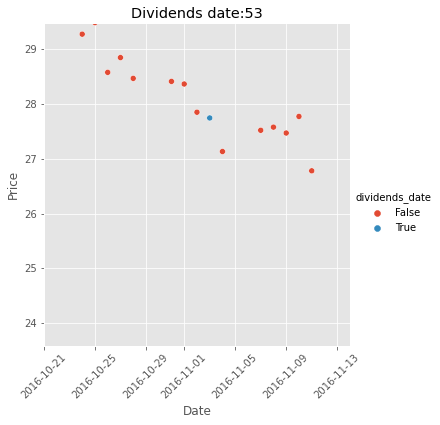

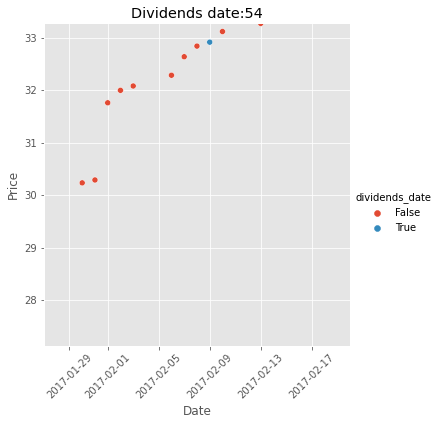

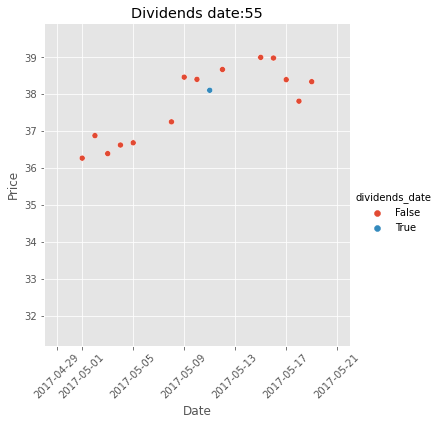

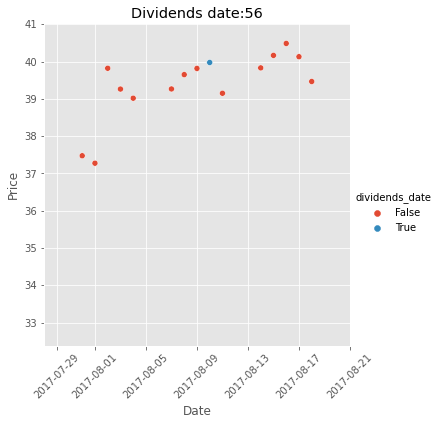

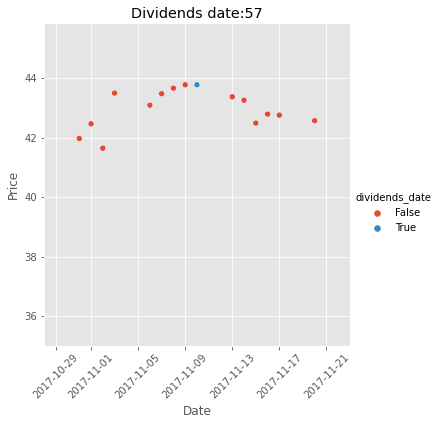

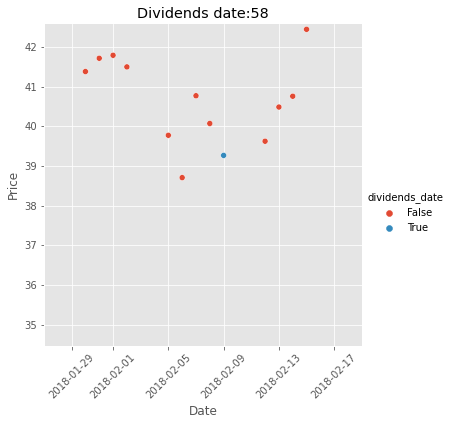

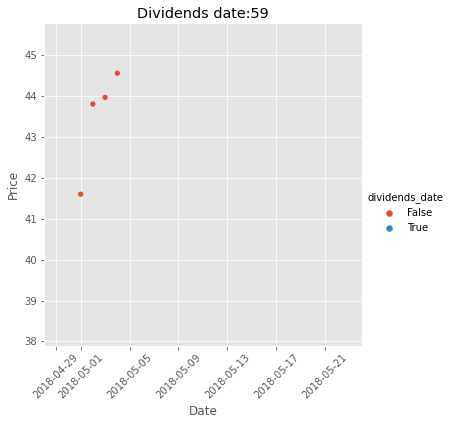

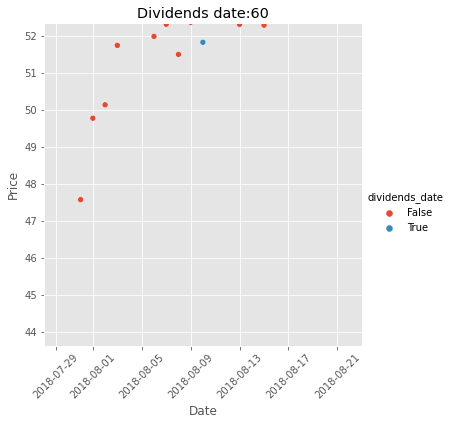

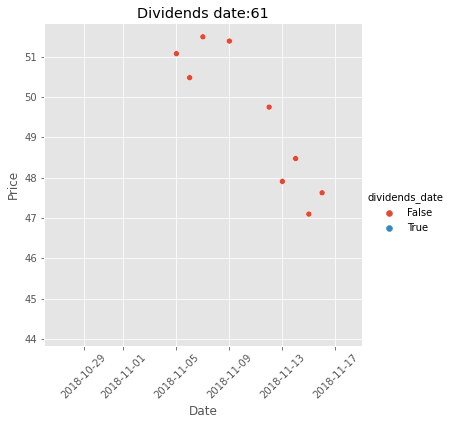

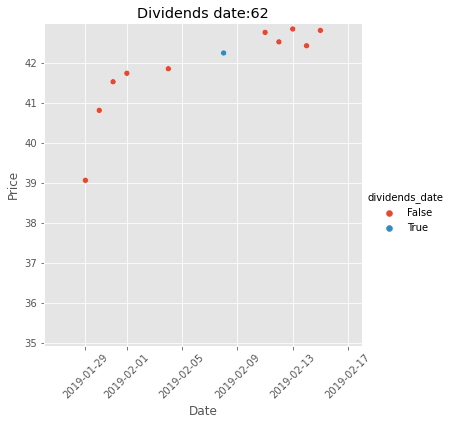

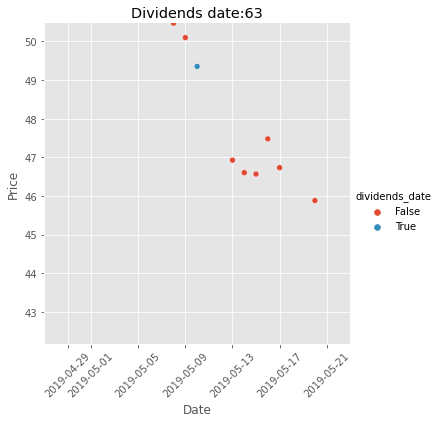

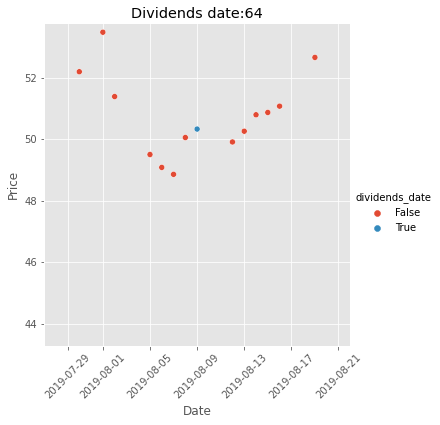

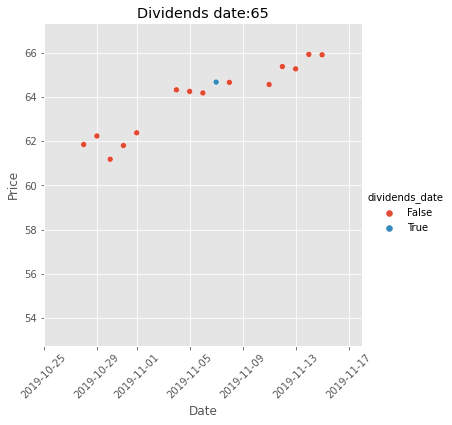

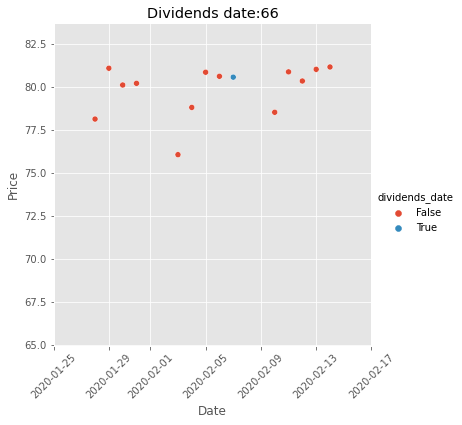

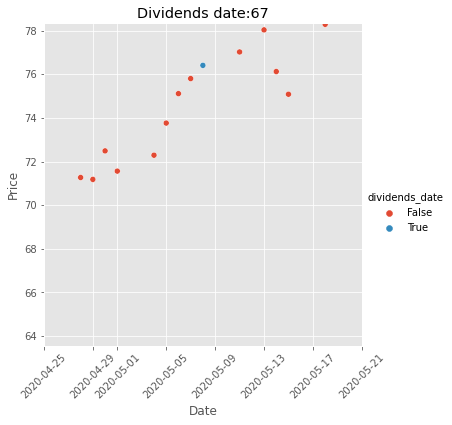

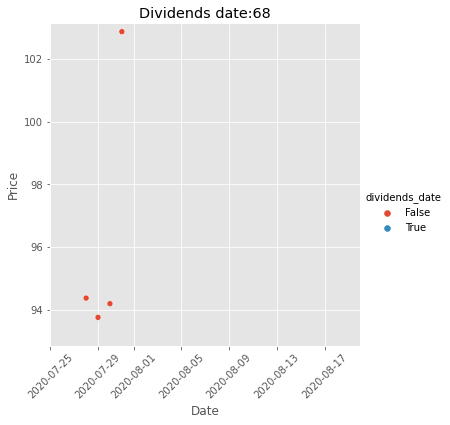

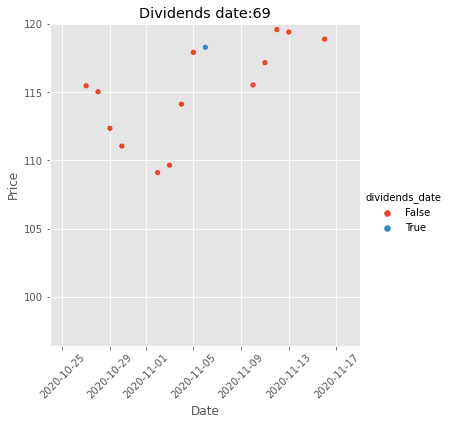

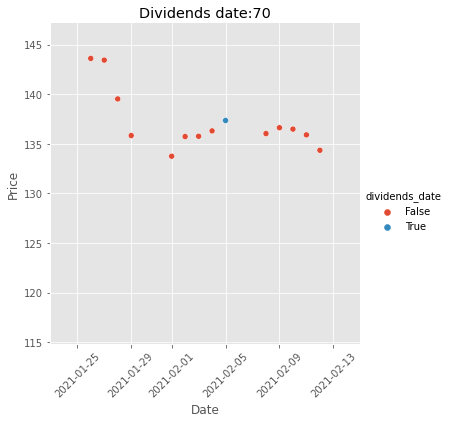

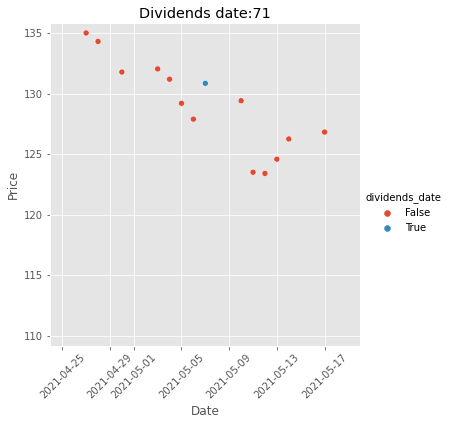

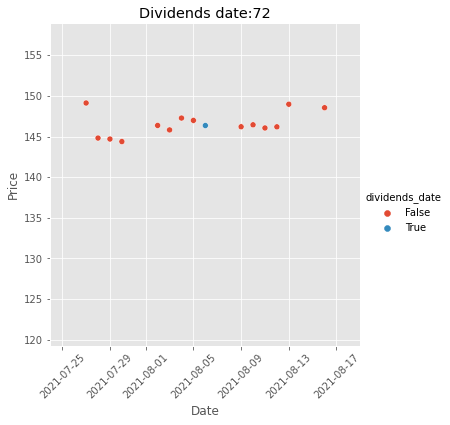

In [8]:
dividends=dividends.sort_values('Date')
new_dataframe=pd.DataFrame()
auxiliar_dataframe=pd.DataFrame()
group=0
for tup in dividends.itertuples():
    dates=[ tup[1]+timedelta(days=i) for i in range(-10,11,1)]
    auxiliar_dataframe=pd.DataFrame({'Date':dates,'Group':[group for i in range(21)]})
    new_dataframe=pd.concat([auxiliar_dataframe,new_dataframe])
    group+=1
merged2=pd.merge(new_dataframe,price)
merged2['dividends_date']=merged2['Date'].isin(dividends['Date'])
mins=merged2.groupby('Group')['Open'].max()
maxs=merged2.groupby('Group')['Open'].min()
Xmins=merged2.groupby('Group')['Date'].max()
Xmaxs=merged2.groupby('Group')['Date'].min()
for i in range(72):
    plt.style.use('ggplot')
    g=sns.relplot(x="Date", y="Open",hue='dividends_date', data=merged2[merged2['Group']==i],kind="scatter")
    g.ax.set_ylim([0.8*mins[i],1.1*maxs[i]])
    g.ax.set_xlim([Xmins[i]+timedelta(days=3),Xmaxs[i]-timedelta(days=3)])
    plt.xticks(rotation=45)
    plt.ylabel('Price')
    plt.gca().invert_xaxis()
    plt.title("Dividends date:"+str(i+1))
    plt.show()


Some of the charts above have missing data. But most have enough data. There is no clear pattern to the naked eye.